In [ ]:
''' Sentiment Analysis, also known as opinion mining, is a technique used in 
NLP to determine the emotional undertone of a document. 
Types:
 - Fine Grained
 - Emotion Detection
 - Intent based Sentiment Analysis
 - Aspect-Based Sentiment Analysis

Applications:
 - Brand Popularity
 - Customer service
 - Monitoring
 - Identifying demographics
'''


In [3]:
import numpy as np
import pandas as pd
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)


In [4]:
df=pd.read_csv("amazon.csv")
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [5]:
df=df.sort_values("wilson_lower_bound",ascending=False)
df.drop("Unnamed: 0", inplace=True, axis=1, errors='ignore')
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [6]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print("TYPES".center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    
    # Filter numerical columns for quantile calculation
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_quantiles = df[numeric_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    print(numeric_quantiles)

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overall 

In [7]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable':dataframe.columns,
                               'Classes':[dataframe[i].nunique() \
                               for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop=True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [19]:
constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#E80CD5']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {"type": "domain"}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=14),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints, line=dict(color="#DBE6EC", width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                         values=df[column_name].value_counts().values,
                         textfont=dict(size=18),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=constraints)),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    iplot(fig)

# Example usage



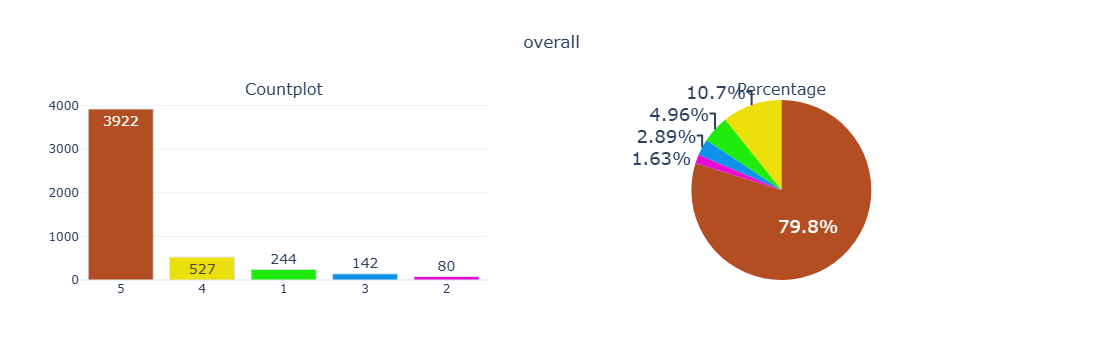

In [20]:
categorical_variable_summary(df, 'overall')

In [21]:
df.reviewText.head()

2031    [[ UPDATE - 6/19/2014 ]]So my lovely wife boug...
3449    I have tested dozens of SDHC and micro-SDHC ca...
4212    NOTE:  please read the last update (scroll to ...
317     If your card gets hot enough to be painful, it...
4672    Sandisk announcement of the first 128GB micro ...
Name: reviewText, dtype: object

In [22]:
review_example = df.reviewText[2031]
review_example

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [23]:
review_example = re.sub("sub[^a-zA-Z]", '', review_example)
review_example        

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [25]:
review_example = review_example.lower().split()
review_example

['[[',
 'update',
 '-',
 '6/19/2014',
 ']]so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 '4',
 'for',
 "father's",
 'day',
 'and',
 "i've",
 'been',
 'loving',
 'it',
 'ever',
 'since.',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products,',
 'the',
 'galaxy',
 'tab',
 '4',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device.',
 'since',
 "it's",
 'been',
 'over',
 'a',
 'year,',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new.',
 'as',
 'of',
 '6/19/2014,',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 '(performance-wise)',
 'are',
 'the',
 'as',
 'follows:sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow,',
 'the',
 'difference',
 'between',
 'all',
 'o

In [26]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ', str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [29]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ----------------------------------- ---- 112.6/126.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [31]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# df[['polarity','subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# for index, row in df['reviewText'].iteritems():
#     score = SentimentIntensityAnalyzer().polarity_scores(row)
#     neg = score['neg']
#     neu = score['neu']
#     pos = score['pos']
#     if neg>pos:
#         df.loc[index, 'sentiment']='Negative'
#     elif pos>neg:
#         df.loc[index, 'sentiment']='Positive'
#     else:
#         df.loc[index, 'sentiment']='Neutral'


import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample DataFrame
df = pd.DataFrame({'reviewText': ["I love this product!", "This is the worst thing I've ever bought."]})

# Add sentiment analysis columns from TextBlob
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get VADER sentiment scores
def get_vader_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

# Apply the VADER sentiment function to the 'reviewText' column
df[['neg', 'neu', 'pos', 'compound']] = df['reviewText'].apply(lambda x: pd.Series(get_vader_sentiment_scores(x)))

# Print the resulting DataFrame
print(df)


                                  reviewText  polarity  subjectivity    neg  \
0                       I love this product!     0.625           0.6  0.000   
1  This is the worst thing I've ever bought.    -1.000           1.0  0.369   

     neu  pos  compound  
0  0.400  0.6    0.6696  
1  0.631  0.0   -0.6249  


In [33]:
# df[df['sentiment']=='Positive'].sort_values("wilson_lower_bound", ascending = False).head(5)
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a 'sentiment' column
df['sentiment'] = df['compound'].apply(categorize_sentiment)

# Print the resulting DataFrame
print(df)


                                  reviewText  polarity  subjectivity    neg  \
0                       I love this product!     0.625           0.6  0.000   
1  This is the worst thing I've ever bought.    -1.000           1.0  0.369   

     neu  pos  compound sentiment  
0  0.400  0.6    0.6696  Positive  
1  0.631  0.0   -0.6249  Negative  


In [36]:
!pip install scipy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 108.9 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.6 kB 146.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 187.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 201.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB 1.9 MB/s eta 0:00:24
   ---------------------------------------- 0.4/45.9 MB 2.0 MB/s eta 0:00:24
    --------------------------------------- 0.7/45.9 MB 1.9 MB/s eta 0:00:24
    --------------------------------------- 0.8/45.9 MB 1.8 MB/s eta 0:00:25
    --------

In [38]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from scipy.stats import norm

# Sample DataFrame
df = pd.DataFrame({
    'reviewText': ["I love this product!", "This is the worst thing I've ever bought.", "It's okay, not great.", "Excellent quality, highly recommend!", "Not worth the money."],
    'helpful_yes': [10, 2, 5, 20, 3],  # example data
    'total_votes': [12, 5, 8, 22, 6]  # example data
})

# Add sentiment analysis columns from TextBlob
df[['polarity', 'subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get VADER sentiment scores
def get_vader_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

# Apply the VADER sentiment function to the 'reviewText' column
df[['neg', 'neu', 'pos', 'compound']] = df['reviewText'].apply(lambda x: pd.Series(get_vader_sentiment_scores(x)))

# Define a function to categorize sentiment based on the compound score
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a 'sentiment' column
df['sentiment'] = df['compound'].apply(categorize_sentiment)

# Define the Wilson Lower Bound function
def wilson_lower_bound(pos, n, confidence=0.95):
    if n == 0:
        return 0
    z = norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * pos / n
    return (phat + z * z / (2 * n) - z * np.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

# Calculate the wilson_lower_bound for each row
df['wilson_lower_bound'] = df.apply(lambda x: wilson_lower_bound(x['helpful_yes'], x['total_votes']), axis=1)

# Filter and sort by 'sentiment' and 'wilson_lower_bound'
result = df[df['sentiment'] == 'Positive'].sort_values("wilson_lower_bound", ascending=False).head(5)

print(result)


                             reviewText  helpful_yes  total_votes  polarity  \
3  Excellent quality, highly recommend!           20           22     0.600   
0                  I love this product!           10           12     0.625   

   subjectivity  neg    neu    pos  compound sentiment  wilson_lower_bound  
3          0.77  0.0  0.228  0.772    0.7773  Positive            0.721851  
0          0.60  0.0  0.400  0.600    0.6696  Positive            0.551969  


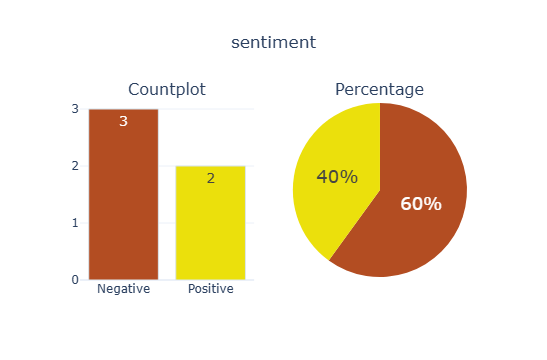

In [39]:
categorical_variable_summary(df, 'sentiment')